In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [487]:
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import numpy as np
import logging

plt.rcParams['font.sans-serif'] = ['SimHei'] #设置参数，能正确显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.rcParams['font.size'] = 13.0 #设置文字大小

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [489]:
x = np.linspace(0, 2, 300).reshape(-1, 1)
# 必须要加上一些随机数，否则模型会把高次（这里是3次）的系数置0，最后相当于始终都是3次项
y = 2 * x * x * x + 0.4 * x * x + 0.9 * x + 2 + np.random.randn(300, 1)/10

In [490]:
# 构造多项式的特征值
poly = PolynomialFeatures(degree=7, include_bias=False)

#x_df = DataFrame(poly.fit_transform(x), columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
x_df = DataFrame(poly.fit_transform(x), columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])

In [492]:
y_train = y[:200]
y_test = y[200:]

# 分别构造不同次项的特征
x_train_df = x_df[:200]
x_test_df = x_df[200:]
x_train_1d = x_train_df[['x1']]
x_test_1d = x_test_df[['x1']]
x_train_2d = x_train_df[['x1', 'x2']]
x_test_2d = x_test_df[['x1', 'x2']]
x_train_3d = x_train_df[['x1', 'x2', 'x3']]
x_test_3d = x_test_df[['x1', 'x2', 'x3']]
x_train_4d = x_train_df[['x1', 'x2', 'x3', 'x4']]
x_test_4d = x_test_df[['x1', 'x2', 'x3', 'x4']]
x_train_5d = x_train_df[['x1', 'x2', 'x3', 'x4', 'x5']]
x_test_5d = x_test_df[['x1', 'x2', 'x3', 'x4', 'x5']]
x_train_6d = x_train_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
x_test_6d = x_test_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
x_train_7d = x_train_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
x_test_7d = x_test_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
# x_train_8d = x_train_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# x_test_8d = x_test_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# x_train_9d = x_train_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']]
# x_test_9d = x_test_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']]
# x_train_10d = x_train_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]
# x_test_10d = x_test_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']]

In [524]:
train_error_list = [] # 保存每一个模型训练集的均方差
test_error_list = [] # 保存每一个模型测试机的均方差
y_predict = [] # 保存所有模型预测出来的结果
model_scores = [] # 保存每个模型的得分

In [525]:
def get_error(x_train, x_test):
    global y_train, y_test, train_error_list, test_error_list, y_predict, model_scores
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    train_error = mean_squared_error(y_train, y_train_predict)
    y_test_predict = model.predict(x_test)
    test_error = mean_squared_error(y_test, y_test_predict)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    model_scores.append(model.score(x_test, y_test))
    y_predict.append(np.concatenate([y_train_predict, y_test_predict]))

In [526]:
get_error(x_train_1d, x_test_1d)
get_error(x_train_2d, x_test_2d)
get_error(x_train_3d, x_test_3d)
get_error(x_train_4d, x_test_4d)
get_error(x_train_5d, x_test_5d)
get_error(x_train_6d, x_test_6d)
get_error(x_train_7d, x_test_7d)
get_error(x_train_8d, x_test_8d)
# get_error(x_train_9d, x_test_9d)
# get_error(x_train_10d, x_test_10d)

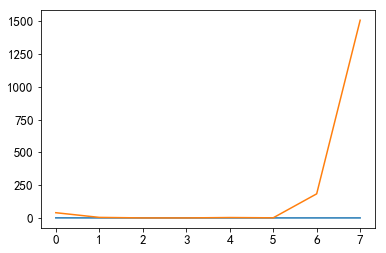

In [527]:
plt.plot(train_error_list) # 画出训练集的错误曲线
plt.plot(test_error_list); # 画出测试集的错误曲线

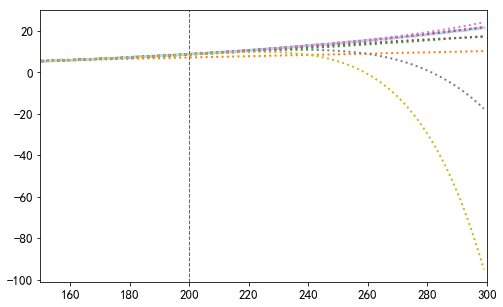

In [528]:
# 画出7个模型在训练集和测试集的预测结果
_ = plt.figure(figsize=(8, 5))
_ = plt.xlim(150, 300)
_ = plt.axvline(200, linewidth=1, linestyle='--')
_ = plt.plot(np.concatenate([y_train, y_test]), linewidth=3, alpha=0.3)
for i in y_predict:
    _ = plt.plot(i, linewidth=2, linestyle=':')

In [497]:
train_error_list

[0.3662961695874317,
 0.017775158815835017,
 0.008675078626047631,
 0.008674403377812157,
 0.008613760157260925,
 0.00860415797622962,
 0.008579371922186253,
 0.00857315960195949]

In [498]:
test_error_list

[39.78360251261666,
 4.047300943598232,
 0.02901165202179939,
 0.04861147384688125,
 2.9607843603094604,
 0.7966386683032547,
 183.81358677428727,
 1508.9144417085897]

In [499]:
model_scores

[-1.896802296980856,
 0.7052999243527528,
 0.9978875462525219,
 0.9964604052874645,
 0.7844135172753786,
 0.941993570756374,
 -12.384198181026504,
 -108.8700606437749]